In [1]:
#Benotigte Madule(inkl. in Anaconda)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.odr import *
from scipy import stats


#%run odr.ipynb

import sys

#1. U;t1;t2;x ersetzen und ihre fehler
#2. anzahl an gaußfunktionen wählen
#3. Startwerte beta0 richtig wählen(vorallem die müs)
#4. stepsize bzw binnabstand fürs histogram

U=np.array([496,494,493,493,493,492,491,491,495,497,497,497,497,497,497,496,496,496,496,496,496,497,497,497,496,497,497
           ,497,497,497,498,498,498,498,498,498,498,499,499,499,499,499,499,498,498,498,498,498,498,498,498,499,499,499
           ,499,499,499,499,499,499])

U_fehler=1
U_err=np.full(len(U),U_fehler)
#Zeit:
t2=np.array([3.59,2.68,5.74,4.17,2.38,3.57,3.53,7.72,3.12,2.09,1.49,2.03,2.03,1.2,1.28,2.12,
            1.90,7.20,7.62,2.77,1.84,2.12,2.08,1.89,3.59,3.89,4.14,5.39,41.69,3.92,2.93,1.83,6.64,1.63,2.29,9.37,3.05,7.76,6.92,4.03,7.44,
            3.23,4.21,2.11,9.00,6.51,2.86,3.24,2.26,8.73,7.32,3.44,4.38,8.75,5.60,4.03,3.78,2.35,4.75,3.02])
t1=np.array([22.16,22.05,5.24,32.58,24.69,32.95,33.94,14.92,34.78,83.15,27.44,54.09,50.33,7.29,25.89,36.08,
            9.33,28.60,27.48,46.90,17.89,26.28,26.36,21.60,9.70,14.43,14.80,22.48,13.70,28.81,16.22,21.24,28.76,17.86,59.12,23.59,11.14,13.41,10.20,25.01,3.30,
            8.08,30.05,9.08,25.23,39.53,16.67,16.89,29.22,26.89,31.92,27.61,11.26,16.86,3.95,4.58,5.23,26.39,55.28,14.13])


t_fehler=0.25
t_err=np.full(len(t1),t_fehler)
t1_err=t2_err=t_err

#Strecke; x ist gemessen durchs Mikroskop; s ist umgerechnet in den Realen wert
x=np.full(len(t1),2)

x_fehler=0.2
x_err=np.full(len(x),x_fehler)

#Position
z=1.875 #zoom

z_err=1.875*0.01
s=x/z*10**(-3)
s_err=np.sqrt((1/z*10**(-3)*x_err)**2+
              (x*10**(-3)*z_err/z**2)**2)

#Geschwindigkeit
v1=s/t1
v1_err=np.sqrt((s_err/t1)**2+(s*t1_err/t1**2)**2)
v2=s/t2
v2_err=np.sqrt((s_err/t2)**2+(s*t2_err/t2**2)**2)


eta=1.81*10**(-5)
d=6*10**(-3)
poel=875.3
pl=1.29
p=874
p_err=0
g=9.81

Q=(v1+v2)*np.sqrt(v1)/U*eta**(3/2)*18*np.pi*d/np.sqrt(2*p*g)
q=Q
Q=Q*10**19

q_err=9*np.pi*d*eta**(3/2)/np.sqrt(g*p)*np.sqrt(((3*v1+v2)/(U*np.sqrt(2*v1))*v1_err)**2+
                                                (np.sqrt(2*v1)/U*v2_err)**2+
                                                (np.sqrt(2*v1)*(v1+v2)/U**2*U_err)**2)
Q_all=Q
#welches eta? 

r=np.sqrt(9*eta*v1/(2*p*g))
#r_err überprüfen
r_err=1/(2*np.sqrt(9*eta*v1/(2*p*g)))*9*eta/(2*p*g)*v1_err

xk=1/(p*r)
yk=(q)**(2/3)

b=8*10**(-5)
p=1013.25
Qk=Q/(1+b/(r*p))**(3/2)
qk=q/(1+b/(r*p))**(3/2)


qk_err=np.sqrt((q_err/(1+b/(r*p))**(3/2))**2+((3*b*q)/(1+b/(r*p))**(5/2)*2*p*r**2)**2)

print(Qk_err-(qk_err*10**(19)))
abslim=1.6*14

Q = Q[Q < abslim]

stepsize=0.25


#Histogramm erstellen
bins=np.arange(min(Q)-stepsize/2,max(Q)+stepsize/1.5,stepsize)
[n,binsh,ka]=plt.hist(Q,bins=bins,density=False,edgecolor='black', linewidth=1.2)
plt.title(stepsize)
plt.xlabel("Q in $10^{-19}$ [As]")
plt.ylabel("Anzahl")
plt.title("Q kleiner als 14*e")

plt.xlim(0,abslim)
plt.savefig("hist_0.25.png",dpi=300)
plt.show()
Q=Qk

bins=np.arange(min(Q)-stepsize/2,max(Q)+stepsize/1.5,stepsize)
[n,binsh,ka]=plt.hist(Q,bins=bins,density=False,edgecolor='black', linewidth=1.2)

plt.xlabel("Q in $10^{-19}$ [As]")
plt.ylabel("Anzahl")
plt.title("Q kleiner als 14*e und korrigierte Ladungen")
#for i in range(int(abslim/1.6)):
#    plt.axvline(x=(i+1)*1.6, linewidth=1, color='r')
plt.xlim(0,abslim)
plt.savefig("hist_0.25_kor.png",dpi=300)

plt.show()

#edgecolor='blue'
bins=np.arange(min(Q)-stepsize/2,max(Q)+stepsize/1.5,stepsize)
[n,binsh,ka]=plt.hist(Q,bins=bins,density=False, linewidth=1.2,alpha = 0.5)
plt.xlabel("Q in $10^{-19}$ [As]")
plt.ylabel("Anzahl")


head_length = 0.3
head_width=0.3
def arrow(x1,x2):
    plt.axvline(x=x1, linewidth=0.75, color='k', linestyle='dashed')
    plt.axvline(x=x2, linewidth=0.75, color='k',linestyle='dashed')

    Qx = Q[(Q > x1) & (Q < x2)] 
    mean=np.mean(Qx)
    avgerr=1.6828674292011299/np.sqrt(len(Qx))
    
    err=(x2-x1)/2
    plt.axvline(x=mean, linewidth=1.5, color='r')
    plt.arrow(x=x1,y=5,dx=(x2-x1)-head_length,dy=0,head_width=head_width, head_length=head_length)
    plt.arrow(x=x2-head_length,y=5,dx=-((x2-x1)-2*head_length),dy=0,head_width=head_width, head_length=head_length)
    #print(err)
    print(str(avgerr))
    return mean


means=np.array([arrow(3,4.1),
                arrow(5,5.8),
                arrow(6.1,6.8),
                arrow(7.1,8.3),
                arrow(9.35,9.7),
                arrow(10.1,11.05),
                arrow(11.6,12.3),
                arrow(12.8,13.1),
                arrow(14.5,15.8),
                arrow(17,17.3),
                arrow(18.7,19.3),
                arrow(20.5,20.9)])

plt.xlim(0,abslim)
plt.savefig("hist_0.25_kor_bins.png",dpi=300)
plt.show()




#Für die Korekturplot:

def lin_func(B, x):
    [m,y0]=B
    return m*x+y0
def fit(x,y,x_err,y_err):
    #definerit die zu fittene Funktion,in B sind die Parameter und x ist die unabhängige

    lin_model = Model(lin_func)

    #Überprüft welche Fehler angegeben wurden
    if (np.isnan(x_err).any() and np.isnan(y_err).any()):
        data = RealData(x, y)
    elif np.isnan(x_err).any():
        data = RealData(x, y, sy=y_err)
    elif np.isnan(y_err).any():
        data = RealData(x, y, sx=x_err)
    else:
        data = RealData(x, y, sx=x_err, sy=y_err)
    
    #Führt den Fit aus, beta0 sind die Startwerte
    odr = ODR(data, lin_model, beta0=[-3*10**(6),0])
    out = odr.run()
    #out.beta beinhaltet die Parameter
    #out.sd_beta beinhaltet die Fehler der Parameter
    return out



if False:

    plt.show()
    out=fit(x=xk,y=yk,x_err=xk_err,y_err=yk_err)
    out.pprint()
    plt.errorbar(xk, yk, xerr=xk_err, yerr=yk_err, color="b", fmt='.', label="Fehler",capsize=5)

    xp=np.linspace(0,4000,40000)
    yp=lin_func(out.beta,xp)
    plt.plot(xp,yp)
    print("b")
    
xk_err=np.sqrt((r_err/(r**2*p))**2+(p_err/(p**2*r))**2)
yk_err=2/(3*q**(1/3))*Q_err
#out = zeichnen(x=xk,y=yk,x_err=xk_err,y_err=yk_err,xlabel="1/(pr)",ylabel="Q^(2/3)",label="",fx_title="Q(n)",x_title="n",m_unit="As",b_unit="As",speichername="b_plot.png",save=True)
print(out.beta[0]/out.beta[1])

NameError: name 'q_err' is not defined

In [259]:
out.beta[0]/out.beta[1]

-0.0003399657803116249

In [72]:
Q[(Q > 3) & (Q < 4.25)]

array([3.77928095, 3.73031248, 3.21199062, 4.00035768, 3.61291032,
       3.51237334, 3.19565028, 3.40622616, 3.40793506, 3.3227498 ])

In [4]:
len(U)

60

In [52]:
len(t2)

41

In [270]:
Qk_err

array([1.00849372e-19, 1.45500088e-19, 2.59185626e-19, 6.61685915e-20,
       1.59537234e-19, 7.87790082e-20, 7.84888612e-20, 6.93295313e-20,
       8.92778332e-20, 8.93576100e-20, 3.04637285e-19, 1.22785306e-19,
       1.28448314e-19, 9.57740012e-19, 4.08174777e-19, 1.48231416e-19,
       4.01600827e-19, 4.17808772e-20, 4.10177706e-20, 8.61192948e-20,
       2.81522075e-19, 1.79751153e-19, 1.84532413e-19, 2.40603060e-19,
       1.83994220e-19, 1.24697201e-19, 1.14975572e-19, 6.51974969e-20,
       4.18733312e-20, 7.63902723e-20, 1.57288119e-19, 2.54883648e-19,
       4.45759695e-20, 3.39241020e-19, 9.67977103e-20, 3.92861647e-20,
       1.94772503e-19, 7.53854404e-20, 1.06755886e-19, 8.11210868e-20,
       4.82293326e-19, 2.35136619e-19, 6.82799462e-20, 3.52244243e-19,
       3.82288430e-20, 3.60250702e-20, 1.59115782e-19, 1.35812476e-19,
       1.53128269e-19, 3.71299882e-20, 3.77168043e-20, 9.11183875e-20,
       1.35027930e-19, 5.58832934e-20, 3.85182475e-19, 3.57687359e-19,
      

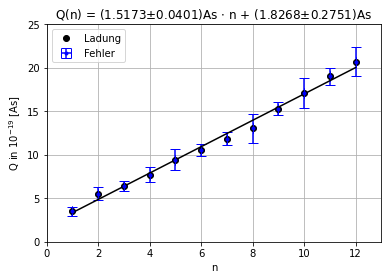

In [276]:
def fit(x,y,x_err,y_err):
    #definerit die zu fittene Funktion,in B sind die Parameter und x ist die unabhängige

    lin_model = Model(lin_func)

    #Überprüft welche Fehler angegeben wurden
    if (np.isnan(x_err).any() and np.isnan(y_err).any()):
        data = RealData(x, y)
    elif np.isnan(x_err).any():
        data = RealData(x, y, sy=y_err)
    elif np.isnan(y_err).any():
        data = RealData(x, y, sx=x_err)
    else:
        data = RealData(x, y, sx=x_err, sy=y_err)
    
    #Führt den Fit aus, beta0 sind die Startwerte
    odr = ODR(data, lin_model, beta0=[1.9,4])
    out = odr.run()
    #out.beta beinhaltet die Parameter
    #out.sd_beta beinhaltet die Fehler der Parameter
    return out

def zeichnen (x, y,label="", speichername="", xlabel="", ylabel="",fx_title="",x_title="", save=False,x_err=np.nan,y_err=np.nan,m_unit="",b_unit=""):
    
    #Überprüft ob x&y die selbe Länge haben
    if not(len(x)==len(y)):
        sys.exit("Die Länge von x und y stimmen nicht überein")
    
    #Fit ereugen
    out = fit(x,y,x_err,y_err)
    
    #Überprüft welche Fehler angegeben wurden und ihre Länge
    if np.isnan(x_err).any():
        x_err=np.zeros_like(x)
    elif not(len(x)==len(x_err)):
        sys.exit("Die Länge von x und x_err stimmen nicht überein")
        
    if np.isnan(y_err).any():
        y_err=np.zeros_like(x)
    elif not(len(y)==len(y_err)):
        sys.exit("Die Länge von y und y_err stimmen nicht überein")
    
    
    #Plottet die Punkte und ihre Fehler
    plt.plot(x, y, "ok", label=label)
    plt.errorbar(x, y, xerr=x_err, yerr=y_err, color="b", fmt='.', label="Fehler",capsize=5)
    
    #Plottet den Linearen Fit
    plt.plot(x, (out.beta[0]*x+out.beta[1]), color="k")
    
    #x,y label
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #Legt den Titel fest, f(x) und x durch die jeweiligen Variabeln Austauschen
    plt.title((fx_title+" = ({:.4f}$\pm${:.4f})".format(out.beta[0],out.sd_beta[0])
               +m_unit+" $\cdot$ "+x_title+" + ({:.4f}$\pm${:.4f})".format(out.beta[1],out.sd_beta[1])+b_unit))
    
    #sonstiges
    plt.grid()
    plt.legend()
    
    #eventuelles Speichern
    if bool(save) == True:
        plt.savefig(speichername,dpi=300)
    
    #Darstellen der Plottes
    plt.show()
    
    #weitergeben der fit Eigenschaften
    return out

xm=np.arange(1,13)
ym=means
plt.xlim(0,13)
plt.ylim(0,25)
error=np.array([0.5321694076387724,
0.7526011937628082,
0.56095580973371,
0.8414337146005649,
1.189966971026091,
0.6870277510486773,
0.7526011937628082,
1.6828674292011299,
0.7526011937628082,
1.6828674292011299,
0.9716039632597259,
1.6828674292011299])
out = zeichnen(x=xm,y=ym,y_err=error,xlabel="n",ylabel="Q in $10^{-19}$ [As]",label="Ladung",fx_title="Q(n)",x_title="n",m_unit="As",b_unit="As",save=True,speichername="e_plot.png")


In [2]:
Q_err

array([1.19017851e-19, 1.71645685e-19, 2.81569553e-19, 8.07062556e-20,
       1.89920990e-19, 9.61884901e-20, 9.61014992e-20, 7.95276540e-20,
       1.09566190e-19, 1.21327018e-19, 3.65896288e-19, 1.57870750e-19,
       1.63801529e-19, 1.05554010e-18, 4.87833016e-19, 1.82562135e-19,
       4.48093007e-19, 5.03636896e-20, 4.92721568e-20, 1.08968528e-19,
       3.26965303e-19, 2.15101906e-19, 2.20880304e-19, 2.83382737e-19,
       2.05720690e-19, 1.42729213e-19, 1.31818372e-19, 7.70299555e-20,
       4.77699550e-20, 9.21419835e-20, 1.81434873e-19, 2.99813035e-19,
       5.37593302e-20, 3.93954158e-19, 1.25768960e-19, 4.65948768e-20,
       2.19452420e-19, 8.58858628e-20, 1.19688765e-19, 9.66732251e-20,
       5.15253696e-19, 2.60436756e-19, 8.26685615e-20, 3.92462664e-19,
       4.55909888e-20, 4.47723315e-20, 1.83887702e-19, 1.57098835e-19,
       1.84934239e-19, 4.45189400e-20, 4.59163320e-20, 1.09499619e-19,
       1.52231252e-19, 6.46341062e-20, 4.14011953e-19, 3.86541437e-19,
      